In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [6]:
df=pd.read_csv('bankchurn.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
df.shape

(10000, 14)

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

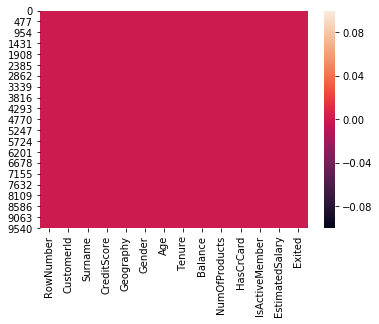

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
df=df.drop(['RowNumber','CustomerId','Surname','Geography'],axis=1)

In [18]:
df.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1890,731,Male,33,4,0.00,2,1,1,74945.11,0
7058,624,Female,71,4,170252.05,3,1,1,73679.59,1
7565,708,Male,52,10,105355.81,1,1,0,123.07,1
4925,817,Male,58,3,114327.59,2,1,1,42831.11,0
4593,633,Female,44,7,0.00,2,1,0,29761.29,0
430,619,Male,57,3,137946.39,1,1,1,72467.99,1
1976,598,Female,38,6,0.00,2,0,0,173783.38,0
3717,646,Male,39,0,154439.86,1,1,0,171519.06,0
7614,749,Male,37,7,0.00,2,1,0,20306.79,0
3221,555,Female,24,2,0.00,2,0,1,197866.55,0


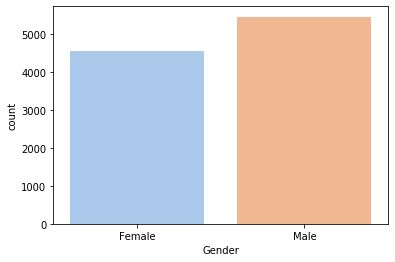

In [20]:
sns.countplot(df.Gender,palette='pastel')

<Figure size 1440x864 with 0 Axes>

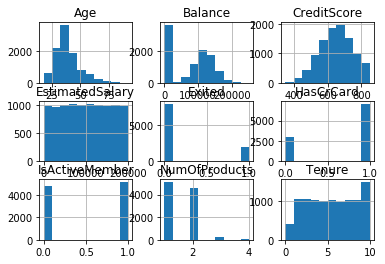

In [22]:
plt.figure(figsize=(20,12))
df.hist()
plt.show()

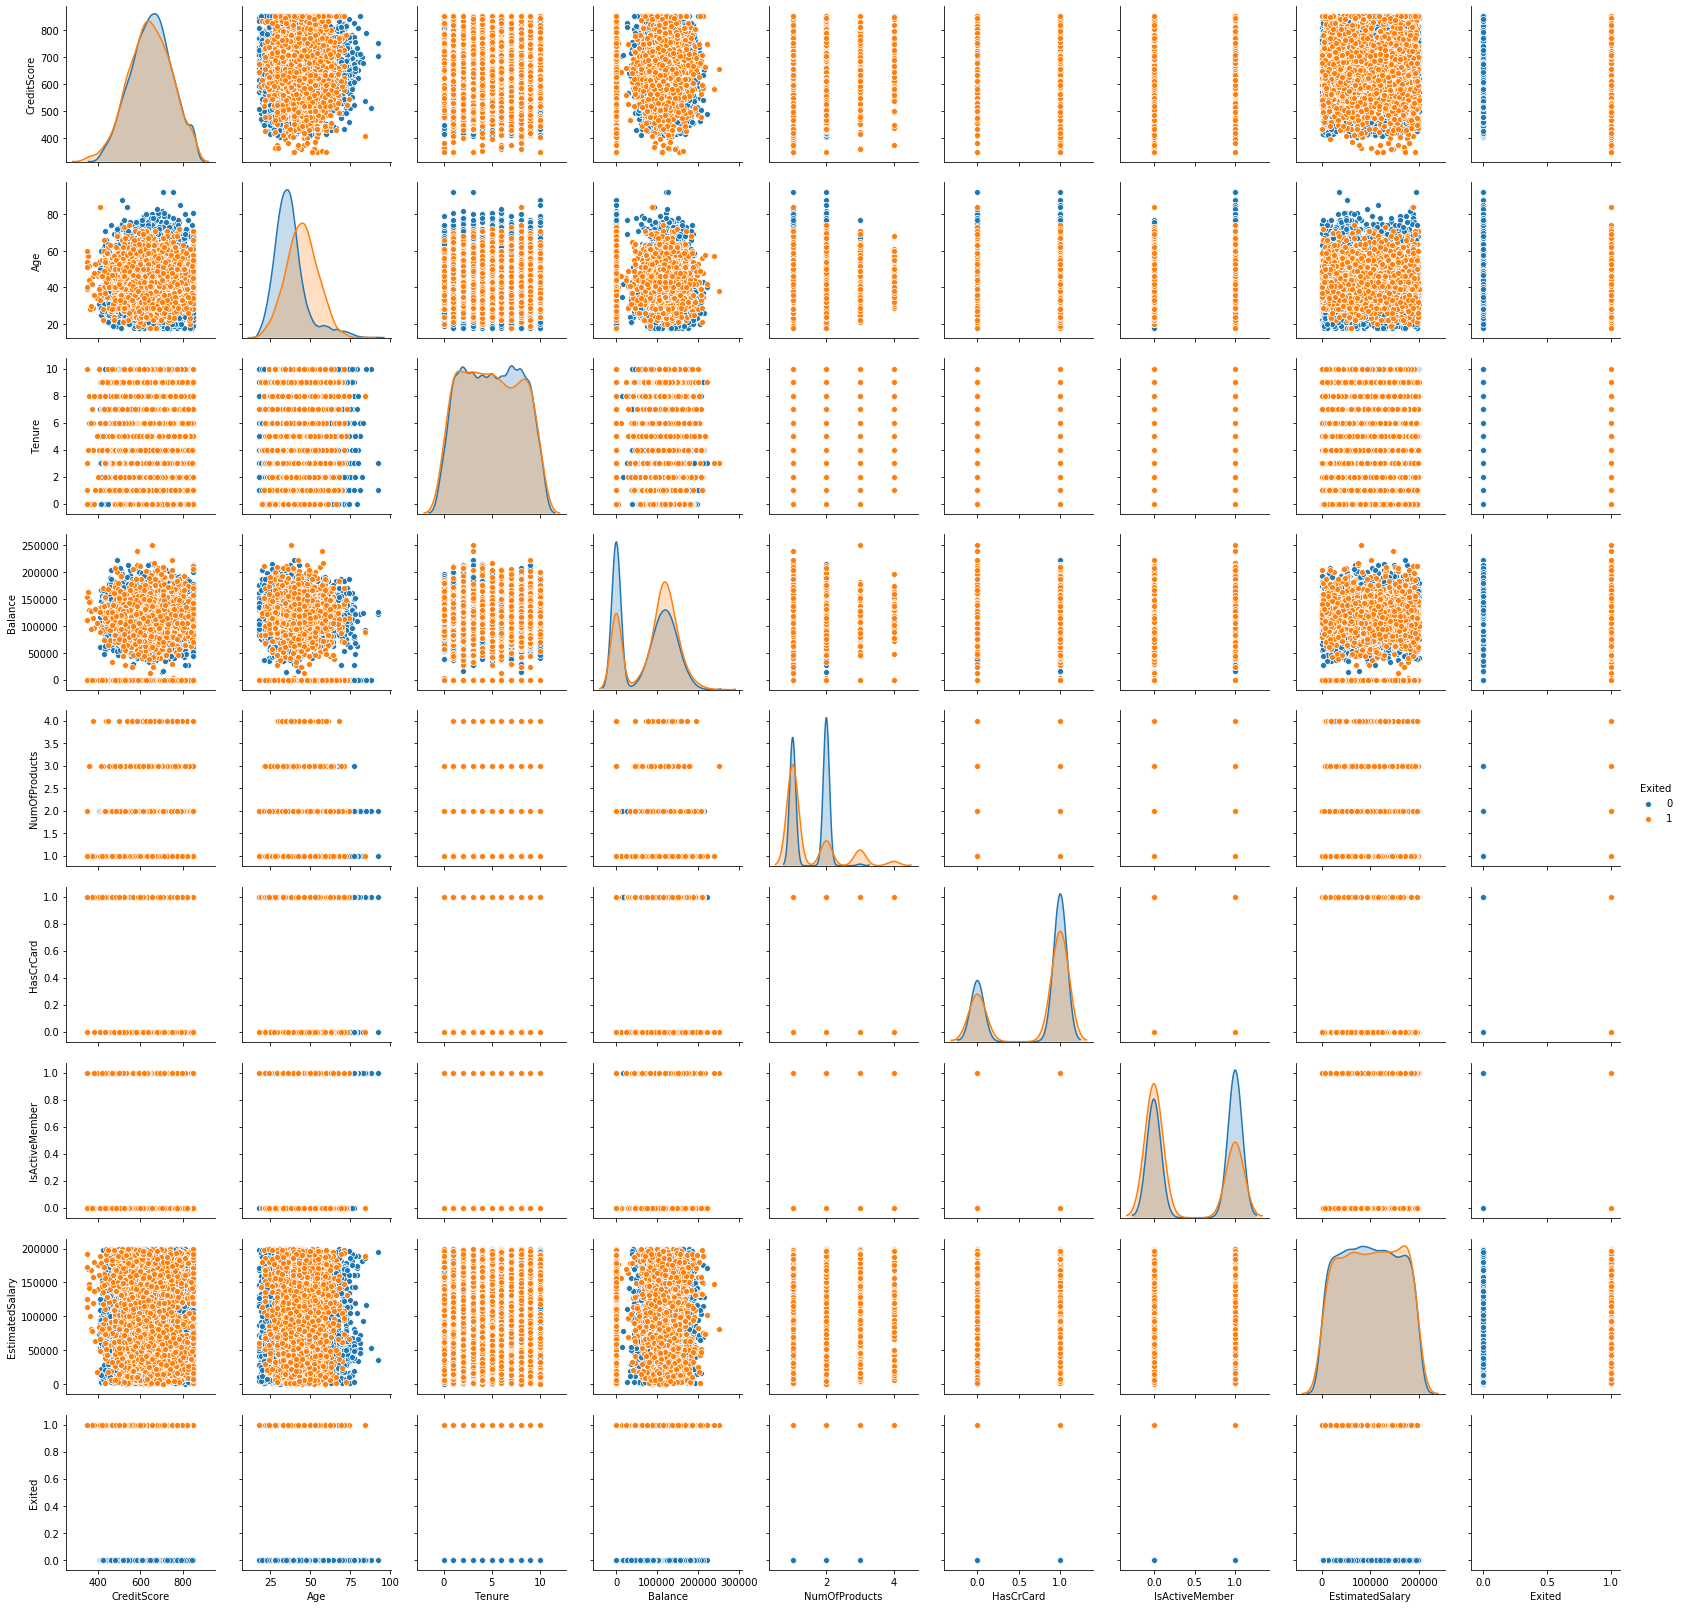

In [24]:
sns.pairplot(df,hue='Exited')

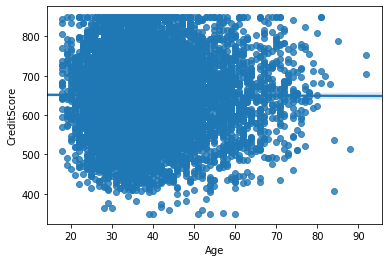

In [25]:
sns.regplot(df.Age,df.CreditScore)

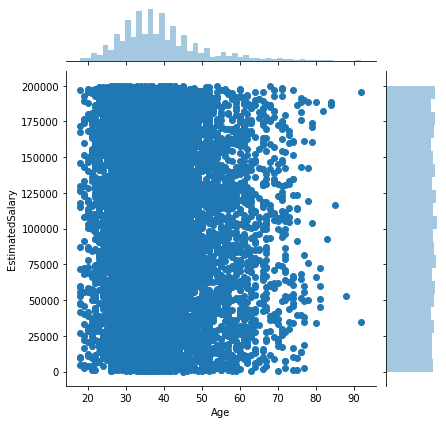

In [26]:
sns.jointplot(df.Age,df.EstimatedSalary)

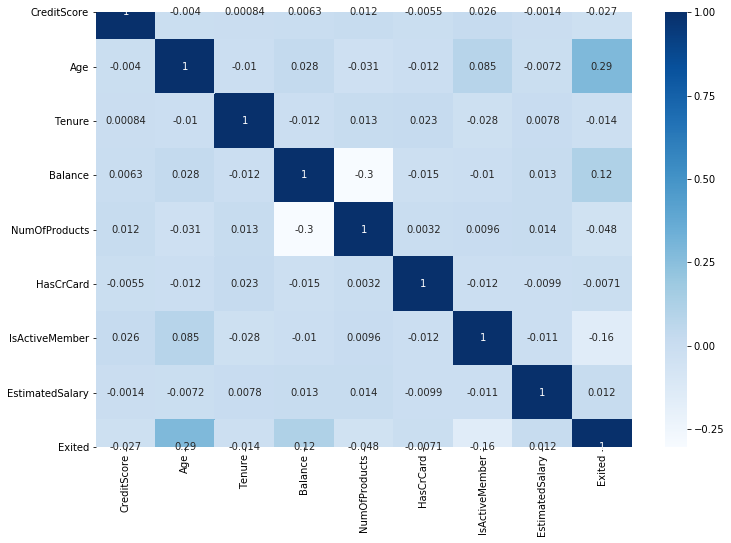

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

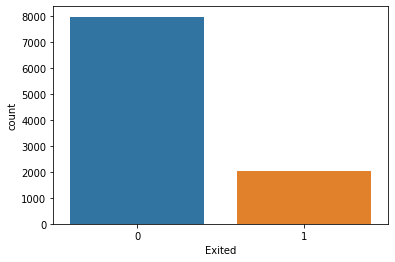

In [29]:
sns.countplot(df.Exited)

In [31]:
df.groupby('Gender')['CreditScore'].mean()

Gender
Female    650.831389
Male      650.276892
Name: CreditScore, dtype: float64

In [32]:
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [33]:
df.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4169,513,0,42,10,0.00,2,0,1,73151.25,0
2462,672,0,53,9,169406.33,4,1,1,147311.47,1
520,850,0,35,1,211774.31,1,1,0,188574.12,1
3572,697,1,31,3,108805.42,2,0,1,123825.83,0
5752,752,0,36,3,0.00,2,1,1,48505.10,0
5983,619,0,28,6,99152.73,2,1,0,48475.12,0
4315,632,1,30,1,58668.02,1,1,1,78670.52,0
5702,585,1,36,7,0.00,2,1,0,94283.09,0
3332,735,1,31,3,119558.35,1,0,0,72927.68,0
4486,528,1,35,3,156687.10,1,1,0,199320.77,0


In [34]:
y=df.Exited
x=df.drop('Exited',axis=1)

In [35]:
y.shape,x.shape

((10000,), (10000, 9))

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [37]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [38]:
# we create artificial neural network model usng Keras


In [47]:
def create_model():
    model= Sequential()
    model.add(Dense(64, kernel_initializer='uniform', activation='relu', input_dim=xtrain.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [48]:
estimator=KerasClassifier(build_fn=create_model,batch_size=10,epochs=500,verbose=1)
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_val_score(estimator,xtrain,ytrain,cv=kfold)
print('Accuracy Mean'+str(scores.mean()))

Epoch 1/500
7199/7199 [==============================] - 6s 868us/step - loss: 0.4600 - accuracy: 0.8078
Epoch 2/500
7199/7199 [==============================] - 2s 338us/step - loss: 0.4199 - accuracy: 0.8291
Epoch 3/500
7199/7199 [==============================] - 2s 342us/step - loss: 0.4004 - accuracy: 0.8337
Epoch 4/500
7199/7199 [==============================] - 3s 368us/step - loss: 0.3756 - accuracy: 0.8457
Epoch 5/500
7199/7199 [==============================] - 2s 328us/step - loss: 0.3712 - accuracy: 0.8490
Epoch 6/500
7199/7199 [==============================] - 2s 308us/step - loss: 0.3693 - accuracy: 0.8500
Epoch 7/500
7199/7199 [==============================] - 2s 310us/step - loss: 0.3659 - accuracy: 0.8507
Epoch 8/500
7199/7199 [==============================] - 2s 343us/step - loss: 0.3670 - accuracy: 0.8512
Epoch 9/500
7199/7199 [==============================] - 2s 302us/step - loss: 0.3661 - accuracy: 0.8532
Epoch 10/500
7199/7199 [==============================]

7199/7199 [==============================] - 2s 322us/step - loss: 0.3332 - accuracy: 0.8644
Epoch 78/500
7199/7199 [==============================] - 3s 375us/step - loss: 0.3354 - accuracy: 0.8612
Epoch 79/500
7199/7199 [==============================] - 2s 315us/step - loss: 0.3380 - accuracy: 0.8593
Epoch 80/500
7199/7199 [==============================] - 2s 307us/step - loss: 0.3310 - accuracy: 0.8658
Epoch 81/500
7199/7199 [==============================] - 2s 331us/step - loss: 0.3329 - accuracy: 0.8616
Epoch 82/500
7199/7199 [==============================] - 2s 304us/step - loss: 0.3360 - accuracy: 0.8603
Epoch 83/500
7199/7199 [==============================] - 3s 383us/step - loss: 0.3352 - accuracy: 0.8587
Epoch 84/500
7199/7199 [==============================] - 3s 355us/step - loss: 0.3337 - accuracy: 0.8612
Epoch 85/500
7199/7199 [==============================] - 2s 328us/step - loss: 0.3348 - accuracy: 0.8626
Epoch 86/500
7199/7199 [==============================] - 2

7199/7199 [==============================] - 2s 248us/step - loss: 0.3210 - accuracy: 0.8693
Epoch 154/500
7199/7199 [==============================] - 2s 231us/step - loss: 0.3215 - accuracy: 0.8691
Epoch 155/500
7199/7199 [==============================] - 2s 239us/step - loss: 0.3212 - accuracy: 0.8675
Epoch 156/500
7199/7199 [==============================] - 2s 222us/step - loss: 0.3209 - accuracy: 0.8655
Epoch 157/500
7199/7199 [==============================] - 2s 229us/step - loss: 0.3218 - accuracy: 0.8687
Epoch 158/500
7199/7199 [==============================] - 2s 220us/step - loss: 0.3200 - accuracy: 0.8682
Epoch 159/500
7199/7199 [==============================] - 2s 250us/step - loss: 0.3215 - accuracy: 0.8664
Epoch 160/500
7199/7199 [==============================] - 2s 243us/step - loss: 0.3192 - accuracy: 0.8710
Epoch 161/500
7199/7199 [==============================] - 2s 215us/step - loss: 0.3177 - accuracy: 0.8678
Epoch 162/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 223us/step - loss: 0.3111 - accuracy: 0.8748
Epoch 230/500
7199/7199 [==============================] - 2s 231us/step - loss: 0.3109 - accuracy: 0.8739
Epoch 231/500
7199/7199 [==============================] - 2s 227us/step - loss: 0.3166 - accuracy: 0.8710
Epoch 232/500
7199/7199 [==============================] - 2s 238us/step - loss: 0.3138 - accuracy: 0.8693
Epoch 233/500
7199/7199 [==============================] - 2s 230us/step - loss: 0.3154 - accuracy: 0.8686
Epoch 234/500
7199/7199 [==============================] - 2s 249us/step - loss: 0.3122 - accuracy: 0.8744
Epoch 235/500
7199/7199 [==============================] - 2s 280us/step - loss: 0.3139 - accuracy: 0.8723
Epoch 236/500
7199/7199 [==============================] - 2s 324us/step - loss: 0.3193 - accuracy: 0.8694
Epoch 237/500
7199/7199 [==============================] - 2s 260us/step - loss: 0.3142 - accuracy: 0.8728
Epoch 238/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 226us/step - loss: 0.3118 - accuracy: 0.8735
Epoch 306/500
7199/7199 [==============================] - 2s 226us/step - loss: 0.3048 - accuracy: 0.8761
Epoch 307/500
7199/7199 [==============================] - 2s 229us/step - loss: 0.3115 - accuracy: 0.8708
Epoch 308/500
7199/7199 [==============================] - 2s 239us/step - loss: 0.3096 - accuracy: 0.8750
Epoch 309/500
7199/7199 [==============================] - 2s 230us/step - loss: 0.3111 - accuracy: 0.8740
Epoch 310/500
7199/7199 [==============================] - 2s 236us/step - loss: 0.3137 - accuracy: 0.8722
Epoch 311/500
7199/7199 [==============================] - 2s 232us/step - loss: 0.3099 - accuracy: 0.8739
Epoch 312/500
7199/7199 [==============================] - 2s 240us/step - loss: 0.3095 - accuracy: 0.8743
Epoch 313/500
7199/7199 [==============================] - 2s 232us/step - loss: 0.3071 - accuracy: 0.8736
Epoch 314/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 221us/step - loss: 0.3127 - accuracy: 0.8732
Epoch 382/500
7199/7199 [==============================] - 2s 240us/step - loss: 0.3100 - accuracy: 0.8754
Epoch 383/500
7199/7199 [==============================] - 2s 239us/step - loss: 0.3039 - accuracy: 0.8783
Epoch 384/500
7199/7199 [==============================] - ETA: 0s - loss: 0.3098 - accuracy: 0.87 - 2s 220us/step - loss: 0.3093 - accuracy: 0.8755
Epoch 385/500
7199/7199 [==============================] - 2s 241us/step - loss: 0.3064 - accuracy: 0.8748
Epoch 386/500
7199/7199 [==============================] - 2s 229us/step - loss: 0.3073 - accuracy: 0.8760
Epoch 387/500
7199/7199 [==============================] - 2s 218us/step - loss: 0.3018 - accuracy: 0.8754
Epoch 388/500
7199/7199 [==============================] - 2s 238us/step - loss: 0.3053 - accuracy: 0.8754
Epoch 389/500
7199/7199 [==============================] - 2s 255us/step - loss: 0.3059 - accuracy: 0.8750
Epoch 390

7199/7199 [==============================] - 2s 228us/step - loss: 0.3021 - accuracy: 0.8778
Epoch 457/500
7199/7199 [==============================] - 2s 229us/step - loss: 0.2974 - accuracy: 0.8790
Epoch 458/500
7199/7199 [==============================] - 2s 233us/step - loss: 0.3021 - accuracy: 0.8800
Epoch 459/500
7199/7199 [==============================] - 2s 238us/step - loss: 0.3060 - accuracy: 0.8765
Epoch 460/500
7199/7199 [==============================] - 2s 234us/step - loss: 0.2970 - accuracy: 0.8801
Epoch 461/500
7199/7199 [==============================] - 2s 225us/step - loss: 0.3068 - accuracy: 0.8755
Epoch 462/500
7199/7199 [==============================] - 2s 224us/step - loss: 0.3017 - accuracy: 0.8807
Epoch 463/500
7199/7199 [==============================] - 2s 236us/step - loss: 0.3054 - accuracy: 0.8750
Epoch 464/500
7199/7199 [==============================] - 2s 248us/step - loss: 0.2998 - accuracy: 0.8775
Epoch 465/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 228us/step - loss: 0.3451 - accuracy: 0.8557
Epoch 33/500
7199/7199 [==============================] - 2s 237us/step - loss: 0.3510 - accuracy: 0.8561
Epoch 34/500
7199/7199 [==============================] - 2s 216us/step - loss: 0.3496 - accuracy: 0.8543
Epoch 35/500
7199/7199 [==============================] - 2s 212us/step - loss: 0.3445 - accuracy: 0.8578
Epoch 36/500
7199/7199 [==============================] - 2s 227us/step - loss: 0.3449 - accuracy: 0.8573
Epoch 37/500
7199/7199 [==============================] - 2s 234us/step - loss: 0.3489 - accuracy: 0.8575
Epoch 38/500
7199/7199 [==============================] - 2s 229us/step - loss: 0.3453 - accuracy: 0.8573
Epoch 39/500
7199/7199 [==============================] - 2s 225us/step - loss: 0.3472 - accuracy: 0.8536
Epoch 40/500
7199/7199 [==============================] - 2s 302us/step - loss: 0.3456 - accuracy: 0.8558
Epoch 41/500
7199/7199 [==============================] - 2

7199/7199 [==============================] - 2s 265us/step - loss: 0.3280 - accuracy: 0.8660
Epoch 110/500
7199/7199 [==============================] - 2s 238us/step - loss: 0.3283 - accuracy: 0.8648
Epoch 111/500
7199/7199 [==============================] - 2s 250us/step - loss: 0.3274 - accuracy: 0.8651
Epoch 112/500
7199/7199 [==============================] - 2s 270us/step - loss: 0.3279 - accuracy: 0.8650
Epoch 113/500
7199/7199 [==============================] - 2s 242us/step - loss: 0.3289 - accuracy: 0.8646
Epoch 114/500
7199/7199 [==============================] - 2s 217us/step - loss: 0.3297 - accuracy: 0.8668
Epoch 115/500
7199/7199 [==============================] - 2s 247us/step - loss: 0.3277 - accuracy: 0.8658
Epoch 116/500
7199/7199 [==============================] - 2s 226us/step - loss: 0.3293 - accuracy: 0.8678
Epoch 117/500
7199/7199 [==============================] - 2s 213us/step - loss: 0.3292 - accuracy: 0.8637
Epoch 118/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 217us/step - loss: 0.3176 - accuracy: 0.8698
Epoch 186/500
7199/7199 [==============================] - 2s 218us/step - loss: 0.3181 - accuracy: 0.8740
Epoch 187/500
7199/7199 [==============================] - 2s 224us/step - loss: 0.3241 - accuracy: 0.8694
Epoch 188/500
7199/7199 [==============================] - 2s 213us/step - loss: 0.3238 - accuracy: 0.8676
Epoch 189/500
7199/7199 [==============================] - 2s 235us/step - loss: 0.3228 - accuracy: 0.8687
Epoch 190/500
7199/7199 [==============================] - 2s 215us/step - loss: 0.3178 - accuracy: 0.8726
Epoch 191/500
7199/7199 [==============================] - 2s 265us/step - loss: 0.3195 - accuracy: 0.8728
Epoch 192/500
7199/7199 [==============================] - 2s 212us/step - loss: 0.3226 - accuracy: 0.8712
Epoch 193/500
7199/7199 [==============================] - 2s 266us/step - loss: 0.3182 - accuracy: 0.87230s - l
Epoch 194/500
7199/7199 [====================

7199/7199 [==============================] - 2s 283us/step - loss: 0.3150 - accuracy: 0.8754
Epoch 262/500
7199/7199 [==============================] - 2s 239us/step - loss: 0.3168 - accuracy: 0.8751
Epoch 263/500
7199/7199 [==============================] - 2s 226us/step - loss: 0.3157 - accuracy: 0.8748
Epoch 264/500
7199/7199 [==============================] - 2s 227us/step - loss: 0.3138 - accuracy: 0.8755
Epoch 265/500
7199/7199 [==============================] - 2s 246us/step - loss: 0.3163 - accuracy: 0.8725
Epoch 266/500
7199/7199 [==============================] - 2s 241us/step - loss: 0.3164 - accuracy: 0.8729
Epoch 267/500
7199/7199 [==============================] - 2s 227us/step - loss: 0.3152 - accuracy: 0.8716
Epoch 268/500
7199/7199 [==============================] - 2s 213us/step - loss: 0.3113 - accuracy: 0.8747
Epoch 269/500
7199/7199 [==============================] - 2s 220us/step - loss: 0.3172 - accuracy: 0.8729
Epoch 270/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 217us/step - loss: 0.3132 - accuracy: 0.8746
Epoch 338/500
7199/7199 [==============================] - 2s 247us/step - loss: 0.3116 - accuracy: 0.8744
Epoch 339/500
7199/7199 [==============================] - 2s 249us/step - loss: 0.3111 - accuracy: 0.8779
Epoch 340/500
7199/7199 [==============================] - 2s 210us/step - loss: 0.3065 - accuracy: 0.8765
Epoch 341/500
7199/7199 [==============================] - 2s 220us/step - loss: 0.3121 - accuracy: 0.8768
Epoch 342/500
7199/7199 [==============================] - 2s 237us/step - loss: 0.3143 - accuracy: 0.8750
Epoch 343/500
7199/7199 [==============================] - 2s 253us/step - loss: 0.3138 - accuracy: 0.8775
Epoch 344/500
7199/7199 [==============================] - 2s 228us/step - loss: 0.3038 - accuracy: 0.8796
Epoch 345/500
7199/7199 [==============================] - 2s 238us/step - loss: 0.3128 - accuracy: 0.8736
Epoch 346/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 222us/step - loss: 0.3091 - accuracy: 0.8787
Epoch 414/500
7199/7199 [==============================] - 2s 214us/step - loss: 0.3123 - accuracy: 0.8798
Epoch 415/500
7199/7199 [==============================] - 2s 230us/step - loss: 0.3080 - accuracy: 0.8775
Epoch 416/500
7199/7199 [==============================] - 2s 252us/step - loss: 0.3062 - accuracy: 0.8812
Epoch 417/500
7199/7199 [==============================] - 2s 220us/step - loss: 0.3078 - accuracy: 0.8782
Epoch 418/500
7199/7199 [==============================] - 2s 219us/step - loss: 0.3124 - accuracy: 0.8753
Epoch 419/500
7199/7199 [==============================] - 2s 223us/step - loss: 0.3061 - accuracy: 0.8805
Epoch 420/500
7199/7199 [==============================] - 2s 213us/step - loss: 0.3042 - accuracy: 0.8796
Epoch 421/500
7199/7199 [==============================] - 2s 227us/step - loss: 0.3081 - accuracy: 0.8811
Epoch 422/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 223us/step - loss: 0.3017 - accuracy: 0.8832
Epoch 490/500
7199/7199 [==============================] - 2s 240us/step - loss: 0.3063 - accuracy: 0.8785
Epoch 491/500
7199/7199 [==============================] - 2s 234us/step - loss: 0.3068 - accuracy: 0.8779
Epoch 492/500
7199/7199 [==============================] - 2s 217us/step - loss: 0.2973 - accuracy: 0.8846
Epoch 493/500
7199/7199 [==============================] - 2s 226us/step - loss: 0.3076 - accuracy: 0.8765
Epoch 494/500
7199/7199 [==============================] - 2s 210us/step - loss: 0.3040 - accuracy: 0.8793
Epoch 495/500
7199/7199 [==============================] - 2s 236us/step - loss: 0.3062 - accuracy: 0.8796
Epoch 496/500
7199/7199 [==============================] - 2s 254us/step - loss: 0.3049 - accuracy: 0.8800
Epoch 497/500
7199/7199 [==============================] - 2s 273us/step - loss: 0.3043 - accuracy: 0.8782
Epoch 498/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 216us/step - loss: 0.3354 - accuracy: 0.8658
Epoch 66/500
7199/7199 [==============================] - 2s 245us/step - loss: 0.3331 - accuracy: 0.8625
Epoch 67/500
7199/7199 [==============================] - 2s 212us/step - loss: 0.3348 - accuracy: 0.8630
Epoch 68/500
7199/7199 [==============================] - 2s 221us/step - loss: 0.3342 - accuracy: 0.8626
Epoch 69/500
7199/7199 [==============================] - 2s 236us/step - loss: 0.3333 - accuracy: 0.8630
Epoch 70/500
7199/7199 [==============================] - 2s 220us/step - loss: 0.3315 - accuracy: 0.8635
Epoch 71/500
7199/7199 [==============================] - 2s 218us/step - loss: 0.3321 - accuracy: 0.8623
Epoch 72/500
7199/7199 [==============================] - 2s 245us/step - loss: 0.3301 - accuracy: 0.8654
Epoch 73/500
7199/7199 [==============================] - 2s 213us/step - loss: 0.3318 - accuracy: 0.8639
Epoch 74/500
7199/7199 [==============================] - 2

7199/7199 [==============================] - 2s 231us/step - loss: 0.3183 - accuracy: 0.8710
Epoch 143/500
7199/7199 [==============================] - 2s 223us/step - loss: 0.3233 - accuracy: 0.8676
Epoch 144/500
7199/7199 [==============================] - 2s 238us/step - loss: 0.3182 - accuracy: 0.8686
Epoch 145/500
7199/7199 [==============================] - 2s 215us/step - loss: 0.3232 - accuracy: 0.8666
Epoch 146/500
7199/7199 [==============================] - 2s 219us/step - loss: 0.3206 - accuracy: 0.8698
Epoch 147/500
7199/7199 [==============================] - 2s 222us/step - loss: 0.3185 - accuracy: 0.8704
Epoch 148/500
7199/7199 [==============================] - 2s 254us/step - loss: 0.3190 - accuracy: 0.8708
Epoch 149/500
7199/7199 [==============================] - 2s 213us/step - loss: 0.3219 - accuracy: 0.8700
Epoch 150/500
7199/7199 [==============================] - 2s 231us/step - loss: 0.3218 - accuracy: 0.8680
Epoch 151/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 223us/step - loss: 0.3089 - accuracy: 0.8776
Epoch 219/500
7199/7199 [==============================] - 2s 249us/step - loss: 0.3144 - accuracy: 0.8729
Epoch 220/500
7199/7199 [==============================] - 2s 217us/step - loss: 0.3144 - accuracy: 0.8748
Epoch 221/500
7199/7199 [==============================] - 2s 234us/step - loss: 0.3140 - accuracy: 0.8741
Epoch 222/500
7199/7199 [==============================] - 2s 222us/step - loss: 0.3155 - accuracy: 0.8729
Epoch 223/500
7199/7199 [==============================] - 2s 233us/step - loss: 0.3097 - accuracy: 0.8748
Epoch 224/500
7199/7199 [==============================] - 2s 223us/step - loss: 0.3116 - accuracy: 0.8726
Epoch 225/500
7199/7199 [==============================] - 2s 229us/step - loss: 0.3155 - accuracy: 0.8764
Epoch 226/500
7199/7199 [==============================] - 2s 214us/step - loss: 0.3182 - accuracy: 0.8751
Epoch 227/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 290us/step - loss: 0.3050 - accuracy: 0.8794
Epoch 295/500
7199/7199 [==============================] - 2s 233us/step - loss: 0.3064 - accuracy: 0.8750
Epoch 296/500
7199/7199 [==============================] - 2s 236us/step - loss: 0.3109 - accuracy: 0.8740
Epoch 297/500
7199/7199 [==============================] - 2s 226us/step - loss: 0.3087 - accuracy: 0.8755
Epoch 298/500
7199/7199 [==============================] - 2s 229us/step - loss: 0.3089 - accuracy: 0.8761
Epoch 299/500
7199/7199 [==============================] - 2s 218us/step - loss: 0.3076 - accuracy: 0.8776
Epoch 300/500
7199/7199 [==============================] - 2s 233us/step - loss: 0.3084 - accuracy: 0.8776
Epoch 301/500
7199/7199 [==============================] - 2s 240us/step - loss: 0.3092 - accuracy: 0.8773
Epoch 302/500
7199/7199 [==============================] - 2s 267us/step - loss: 0.3087 - accuracy: 0.8772
Epoch 303/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 216us/step - loss: 0.3038 - accuracy: 0.8771
Epoch 371/500
7199/7199 [==============================] - 2s 265us/step - loss: 0.3066 - accuracy: 0.8785
Epoch 372/500
7199/7199 [==============================] - 2s 223us/step - loss: 0.3041 - accuracy: 0.8757
Epoch 373/500
7199/7199 [==============================] - 2s 214us/step - loss: 0.3081 - accuracy: 0.8794
Epoch 374/500
7199/7199 [==============================] - 2s 335us/step - loss: 0.3070 - accuracy: 0.8776
Epoch 375/500
7199/7199 [==============================] - 3s 380us/step - loss: 0.3024 - accuracy: 0.8796
Epoch 376/500
7199/7199 [==============================] - 3s 363us/step - loss: 0.3054 - accuracy: 0.8782
Epoch 377/500
7199/7199 [==============================] - 2s 225us/step - loss: 0.3075 - accuracy: 0.8750
Epoch 378/500
7199/7199 [==============================] - 2s 262us/step - loss: 0.3095 - accuracy: 0.8761
Epoch 379/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 238us/step - loss: 0.3063 - accuracy: 0.8750
Epoch 447/500
7199/7199 [==============================] - 2s 218us/step - loss: 0.3037 - accuracy: 0.8817
Epoch 448/500
7199/7199 [==============================] - 2s 253us/step - loss: 0.2991 - accuracy: 0.8810
Epoch 449/500
7199/7199 [==============================] - 2s 219us/step - loss: 0.3081 - accuracy: 0.8790
Epoch 450/500
7199/7199 [==============================] - 2s 236us/step - loss: 0.3057 - accuracy: 0.8779
Epoch 451/500
7199/7199 [==============================] - 2s 263us/step - loss: 0.3001 - accuracy: 0.8782
Epoch 452/500
7199/7199 [==============================] - 2s 248us/step - loss: 0.3023 - accuracy: 0.8790
Epoch 453/500
7199/7199 [==============================] - 2s 226us/step - loss: 0.2987 - accuracy: 0.8833
Epoch 454/500
7199/7199 [==============================] - 2s 226us/step - loss: 0.3077 - accuracy: 0.8754
Epoch 455/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 281us/step - loss: 0.3548 - accuracy: 0.8547
Epoch 23/500
7199/7199 [==============================] - 2s 249us/step - loss: 0.3540 - accuracy: 0.8564
Epoch 24/500
7199/7199 [==============================] - 2s 283us/step - loss: 0.3541 - accuracy: 0.8530
Epoch 25/500
7199/7199 [==============================] - 2s 252us/step - loss: 0.3526 - accuracy: 0.8571
Epoch 26/500
7199/7199 [==============================] - 2s 259us/step - loss: 0.3521 - accuracy: 0.8566
Epoch 27/500
7199/7199 [==============================] - 2s 262us/step - loss: 0.3517 - accuracy: 0.8550
Epoch 28/500
7199/7199 [==============================] - 2s 296us/step - loss: 0.3524 - accuracy: 0.8557
Epoch 29/500
7199/7199 [==============================] - 2s 222us/step - loss: 0.3501 - accuracy: 0.8573
Epoch 30/500
7199/7199 [==============================] - 2s 244us/step - loss: 0.3489 - accuracy: 0.8561
Epoch 31/500
7199/7199 [==============================] - 2

7199/7199 [==============================] - 2s 220us/step - loss: 0.3305 - accuracy: 0.8648
Epoch 100/500
7199/7199 [==============================] - 2s 213us/step - loss: 0.3327 - accuracy: 0.8637
Epoch 101/500
7199/7199 [==============================] - 2s 243us/step - loss: 0.3337 - accuracy: 0.8603
Epoch 102/500
7199/7199 [==============================] - 2s 220us/step - loss: 0.3303 - accuracy: 0.8655
Epoch 103/500
7199/7199 [==============================] - 2s 235us/step - loss: 0.3340 - accuracy: 0.8637
Epoch 104/500
7199/7199 [==============================] - 2s 217us/step - loss: 0.3325 - accuracy: 0.8636
Epoch 105/500
7199/7199 [==============================] - 2s 221us/step - loss: 0.3288 - accuracy: 0.8654
Epoch 106/500
7199/7199 [==============================] - 2s 220us/step - loss: 0.3285 - accuracy: 0.8658
Epoch 107/500
7199/7199 [==============================] - 3s 356us/step - loss: 0.3281 - accuracy: 0.8643
Epoch 108/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 259us/step - loss: 0.3191 - accuracy: 0.8678
Epoch 176/500
7199/7199 [==============================] - 2s 241us/step - loss: 0.3205 - accuracy: 0.8687
Epoch 177/500
7199/7199 [==============================] - 2s 267us/step - loss: 0.3180 - accuracy: 0.8701
Epoch 178/500
7199/7199 [==============================] - 2s 235us/step - loss: 0.3162 - accuracy: 0.8703
Epoch 179/500
7199/7199 [==============================] - 2s 223us/step - loss: 0.3212 - accuracy: 0.8668
Epoch 180/500
7199/7199 [==============================] - 2s 241us/step - loss: 0.3243 - accuracy: 0.8676
Epoch 181/500
7199/7199 [==============================] - 2s 225us/step - loss: 0.3202 - accuracy: 0.8700
Epoch 182/500
7199/7199 [==============================] - 2s 233us/step - loss: 0.3229 - accuracy: 0.8654
Epoch 183/500
7199/7199 [==============================] - 2s 255us/step - loss: 0.3247 - accuracy: 0.8700
Epoch 184/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 227us/step - loss: 0.3208 - accuracy: 0.8703
Epoch 252/500
7199/7199 [==============================] - 2s 223us/step - loss: 0.3098 - accuracy: 0.8723
Epoch 253/500
7199/7199 [==============================] - 2s 235us/step - loss: 0.3170 - accuracy: 0.8725
Epoch 254/500
7199/7199 [==============================] - 2s 227us/step - loss: 0.3144 - accuracy: 0.8739
Epoch 255/500
7199/7199 [==============================] - 2s 244us/step - loss: 0.3124 - accuracy: 0.8726
Epoch 256/500
7199/7199 [==============================] - 2s 257us/step - loss: 0.3148 - accuracy: 0.8716
Epoch 257/500
7199/7199 [==============================] - 2s 231us/step - loss: 0.3117 - accuracy: 0.8736
Epoch 258/500
7199/7199 [==============================] - 2s 235us/step - loss: 0.3134 - accuracy: 0.8712
Epoch 259/500
7199/7199 [==============================] - 2s 225us/step - loss: 0.3100 - accuracy: 0.8743
Epoch 260/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 228us/step - loss: 0.3095 - accuracy: 0.8751
Epoch 328/500
7199/7199 [==============================] - 2s 229us/step - loss: 0.3108 - accuracy: 0.8722
Epoch 329/500
7199/7199 [==============================] - 2s 240us/step - loss: 0.3161 - accuracy: 0.8726
Epoch 330/500
7199/7199 [==============================] - 2s 258us/step - loss: 0.3050 - accuracy: 0.8755
Epoch 331/500
7199/7199 [==============================] - 2s 234us/step - loss: 0.3040 - accuracy: 0.8737
Epoch 332/500
7199/7199 [==============================] - 2s 242us/step - loss: 0.3076 - accuracy: 0.8726
Epoch 333/500
7199/7199 [==============================] - 2s 222us/step - loss: 0.3117 - accuracy: 0.8758
Epoch 334/500
7199/7199 [==============================] - 2s 240us/step - loss: 0.3067 - accuracy: 0.8747
Epoch 335/500
7199/7199 [==============================] - 2s 223us/step - loss: 0.3120 - accuracy: 0.8725
Epoch 336/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 241us/step - loss: 0.3011 - accuracy: 0.8775
Epoch 404/500
7199/7199 [==============================] - 2s 250us/step - loss: 0.3070 - accuracy: 0.8726
Epoch 405/500
7199/7199 [==============================] - 2s 235us/step - loss: 0.3028 - accuracy: 0.8786
Epoch 406/500
7199/7199 [==============================] - 2s 236us/step - loss: 0.3051 - accuracy: 0.8783
Epoch 407/500
7199/7199 [==============================] - 2s 229us/step - loss: 0.3047 - accuracy: 0.8754
Epoch 408/500
7199/7199 [==============================] - 2s 230us/step - loss: 0.3058 - accuracy: 0.8744
Epoch 409/500
7199/7199 [==============================] - 2s 245us/step - loss: 0.3015 - accuracy: 0.8779
Epoch 410/500
7199/7199 [==============================] - 2s 252us/step - loss: 0.3031 - accuracy: 0.8771
Epoch 411/500
7199/7199 [==============================] - 2s 269us/step - loss: 0.3057 - accuracy: 0.8736
Epoch 412/500
7199/7199 [==========================

7199/7199 [==============================] - 2s 240us/step - loss: 0.2969 - accuracy: 0.8791
Epoch 480/500
7199/7199 [==============================] - 2s 249us/step - loss: 0.3028 - accuracy: 0.8772
Epoch 481/500
7199/7199 [==============================] - 2s 266us/step - loss: 0.3000 - accuracy: 0.8800
Epoch 482/500
7199/7199 [==============================] - 2s 218us/step - loss: 0.3074 - accuracy: 0.8726
Epoch 483/500
7199/7199 [==============================] - 2s 241us/step - loss: 0.3003 - accuracy: 0.8789
Epoch 484/500
7199/7199 [==============================] - 2s 243us/step - loss: 0.2988 - accuracy: 0.8794
Epoch 485/500
7199/7199 [==============================] - 2s 229us/step - loss: 0.2992 - accuracy: 0.8787
Epoch 486/500
7199/7199 [==============================] - 2s 230us/step - loss: 0.2959 - accuracy: 0.8821
Epoch 487/500
7199/7199 [==============================] - 2s 232us/step - loss: 0.3036 - accuracy: 0.8761
Epoch 488/500
7199/7199 [==========================

7200/7200 [==============================] - 2s 242us/step - loss: 0.3391 - accuracy: 0.8625
Epoch 56/500
7200/7200 [==============================] - 2s 226us/step - loss: 0.3411 - accuracy: 0.8606
Epoch 57/500
7200/7200 [==============================] - 2s 223us/step - loss: 0.3396 - accuracy: 0.8611
Epoch 58/500
7200/7200 [==============================] - 2s 240us/step - loss: 0.3367 - accuracy: 0.8644
Epoch 59/500
7200/7200 [==============================] - 2s 226us/step - loss: 0.3410 - accuracy: 0.8578
Epoch 60/500
7200/7200 [==============================] - 2s 247us/step - loss: 0.3400 - accuracy: 0.8589
Epoch 61/500
7200/7200 [==============================] - 2s 224us/step - loss: 0.3385 - accuracy: 0.8603
Epoch 62/500
7200/7200 [==============================] - 2s 230us/step - loss: 0.3399 - accuracy: 0.8603
Epoch 63/500
7200/7200 [==============================] - 2s 221us/step - loss: 0.3440 - accuracy: 0.8610
Epoch 64/500
7200/7200 [==============================] - 2

7200/7200 [==============================] - 2s 220us/step - loss: 0.3268 - accuracy: 0.8672
Epoch 133/500
7200/7200 [==============================] - 2s 229us/step - loss: 0.3285 - accuracy: 0.8662
Epoch 134/500
7200/7200 [==============================] - 2s 221us/step - loss: 0.3306 - accuracy: 0.8662
Epoch 135/500
7200/7200 [==============================] - 2s 226us/step - loss: 0.3285 - accuracy: 0.8640
Epoch 136/500
7200/7200 [==============================] - 2s 225us/step - loss: 0.3248 - accuracy: 0.8686
Epoch 137/500
7200/7200 [==============================] - 2s 265us/step - loss: 0.3289 - accuracy: 0.8649
Epoch 138/500
7200/7200 [==============================] - 2s 227us/step - loss: 0.3298 - accuracy: 0.8639
Epoch 139/500
7200/7200 [==============================] - 2s 224us/step - loss: 0.3243 - accuracy: 0.86870s - l
Epoch 140/500
7200/7200 [==============================] - 2s 237us/step - loss: 0.3285 - accuracy: 0.8631
Epoch 141/500
7200/7200 [====================

Epoch 208/500
7200/7200 [==============================] - 2s 236us/step - loss: 0.3163 - accuracy: 0.8725
Epoch 209/500
7200/7200 [==============================] - 2s 228us/step - loss: 0.3198 - accuracy: 0.8711
Epoch 210/500
7200/7200 [==============================] - 2s 239us/step - loss: 0.3185 - accuracy: 0.8686
Epoch 211/500
7200/7200 [==============================] - 2s 220us/step - loss: 0.3200 - accuracy: 0.8694
Epoch 212/500
7200/7200 [==============================] - 2s 260us/step - loss: 0.3238 - accuracy: 0.8735
Epoch 213/500
7200/7200 [==============================] - 2s 217us/step - loss: 0.3219 - accuracy: 0.8693
Epoch 214/500
7200/7200 [==============================] - 2s 224us/step - loss: 0.3214 - accuracy: 0.8714
Epoch 215/500
7200/7200 [==============================] - 2s 228us/step - loss: 0.3207 - accuracy: 0.8703
Epoch 216/500
7200/7200 [==============================] - 2s 245us/step - loss: 0.3212 - accuracy: 0.8693
Epoch 217/500
7200/7200 [============

7200/7200 [==============================] - 2s 237us/step - loss: 0.3111 - accuracy: 0.8749
Epoch 285/500
7200/7200 [==============================] - 2s 219us/step - loss: 0.3135 - accuracy: 0.8733
Epoch 286/500
7200/7200 [==============================] - 2s 222us/step - loss: 0.3193 - accuracy: 0.8701
Epoch 287/500
7200/7200 [==============================] - 2s 246us/step - loss: 0.3133 - accuracy: 0.8737
Epoch 288/500
7200/7200 [==============================] - 2s 237us/step - loss: 0.3106 - accuracy: 0.8750
Epoch 289/500
7200/7200 [==============================] - 2s 231us/step - loss: 0.3116 - accuracy: 0.8753
Epoch 290/500
7200/7200 [==============================] - 2s 234us/step - loss: 0.3186 - accuracy: 0.8706
Epoch 291/500
7200/7200 [==============================] - 2s 225us/step - loss: 0.3142 - accuracy: 0.8756
Epoch 292/500
7200/7200 [==============================] - 2s 236us/step - loss: 0.3115 - accuracy: 0.8747
Epoch 293/500
7200/7200 [==========================

7200/7200 [==============================] - 2s 222us/step - loss: 0.3083 - accuracy: 0.8744
Epoch 361/500
7200/7200 [==============================] - 2s 229us/step - loss: 0.3089 - accuracy: 0.8783
Epoch 362/500
7200/7200 [==============================] - 2s 229us/step - loss: 0.3129 - accuracy: 0.8744
Epoch 363/500
7200/7200 [==============================] - 2s 232us/step - loss: 0.3096 - accuracy: 0.87891s - l
Epoch 364/500
7200/7200 [==============================] - 2s 235us/step - loss: 0.3119 - accuracy: 0.8743
Epoch 365/500
7200/7200 [==============================] - 2s 231us/step - loss: 0.3099 - accuracy: 0.8760
Epoch 366/500
7200/7200 [==============================] - 2s 221us/step - loss: 0.3122 - accuracy: 0.8750
Epoch 367/500
7200/7200 [==============================] - 2s 224us/step - loss: 0.3119 - accuracy: 0.8758
Epoch 368/500
7200/7200 [==============================] - 2s 230us/step - loss: 0.3129 - accuracy: 0.8775
Epoch 369/500
7200/7200 [====================

7200/7200 [==============================] - 2s 225us/step - loss: 0.3051 - accuracy: 0.8785
Epoch 437/500
7200/7200 [==============================] - 2s 218us/step - loss: 0.3050 - accuracy: 0.8794
Epoch 438/500
7200/7200 [==============================] - 2s 232us/step - loss: 0.3081 - accuracy: 0.8794
Epoch 439/500
7200/7200 [==============================] - 2s 230us/step - loss: 0.3066 - accuracy: 0.8775
Epoch 440/500
7200/7200 [==============================] - 2s 235us/step - loss: 0.3150 - accuracy: 0.8732
Epoch 441/500
7200/7200 [==============================] - 2s 239us/step - loss: 0.3097 - accuracy: 0.8747
Epoch 442/500
7200/7200 [==============================] - 2s 224us/step - loss: 0.3075 - accuracy: 0.8753
Epoch 443/500
7200/7200 [==============================] - 2s 217us/step - loss: 0.3055 - accuracy: 0.8785
Epoch 444/500
7200/7200 [==============================] - 2s 284us/step - loss: 0.3040 - accuracy: 0.8774
Epoch 445/500
7200/7200 [==========================

7200/7200 [==============================] - 2s 241us/step - loss: 0.3613 - accuracy: 0.85310s - loss: 0.3
Epoch 12/500
7200/7200 [==============================] - 2s 263us/step - loss: 0.3632 - accuracy: 0.8524
Epoch 13/500
7200/7200 [==============================] - 2s 232us/step - loss: 0.3592 - accuracy: 0.8542
Epoch 14/500
7200/7200 [==============================] - 2s 259us/step - loss: 0.3607 - accuracy: 0.8518
Epoch 15/500
7200/7200 [==============================] - ETA: 0s - loss: 0.3619 - accuracy: 0.85 - 2s 253us/step - loss: 0.3626 - accuracy: 0.8517
Epoch 16/500
7200/7200 [==============================] - 2s 221us/step - loss: 0.3605 - accuracy: 0.8531
Epoch 17/500
7200/7200 [==============================] - 2s 223us/step - loss: 0.3565 - accuracy: 0.8528
Epoch 18/500
7200/7200 [==============================] - 2s 261us/step - loss: 0.3610 - accuracy: 0.8550
Epoch 19/500
7200/7200 [==============================] - 2s 226us/step - loss: 0.3545 - accuracy: 0.8557
Epo

7200/7200 [==============================] - 2s 256us/step - loss: 0.3330 - accuracy: 0.8640
Epoch 88/500
7200/7200 [==============================] - 2s 221us/step - loss: 0.3331 - accuracy: 0.8700
Epoch 89/500
7200/7200 [==============================] - 2s 230us/step - loss: 0.3331 - accuracy: 0.8657
Epoch 90/500
7200/7200 [==============================] - 2s 218us/step - loss: 0.3322 - accuracy: 0.8650
Epoch 91/500
7200/7200 [==============================] - 2s 230us/step - loss: 0.3340 - accuracy: 0.8631
Epoch 92/500
7200/7200 [==============================] - 2s 239us/step - loss: 0.3326 - accuracy: 0.8665
Epoch 93/500
7200/7200 [==============================] - 2s 239us/step - loss: 0.3328 - accuracy: 0.8672
Epoch 94/500
7200/7200 [==============================] - 2s 219us/step - loss: 0.3356 - accuracy: 0.8629
Epoch 95/500
7200/7200 [==============================] - 2s 227us/step - loss: 0.3316 - accuracy: 0.8628
Epoch 96/500
7200/7200 [==============================] - 2

7200/7200 [==============================] - 2s 231us/step - loss: 0.3209 - accuracy: 0.8732
Epoch 164/500
7200/7200 [==============================] - 2s 230us/step - loss: 0.3231 - accuracy: 0.8693
Epoch 165/500
7200/7200 [==============================] - 2s 261us/step - loss: 0.3238 - accuracy: 0.8683
Epoch 166/500
7200/7200 [==============================] - 2s 250us/step - loss: 0.3211 - accuracy: 0.8718
Epoch 167/500
7200/7200 [==============================] - 2s 237us/step - loss: 0.3194 - accuracy: 0.8725
Epoch 168/500
7200/7200 [==============================] - 2s 247us/step - loss: 0.3246 - accuracy: 0.8719
Epoch 169/500
7200/7200 [==============================] - 2s 236us/step - loss: 0.3210 - accuracy: 0.8696
Epoch 170/500
7200/7200 [==============================] - 2s 237us/step - loss: 0.3252 - accuracy: 0.8710
Epoch 171/500
7200/7200 [==============================] - 2s 222us/step - loss: 0.3238 - accuracy: 0.8717
Epoch 172/500
7200/7200 [==========================

7200/7200 [==============================] - 2s 304us/step - loss: 0.3163 - accuracy: 0.8750
Epoch 240/500
7200/7200 [==============================] - 2s 329us/step - loss: 0.3181 - accuracy: 0.8717
Epoch 241/500
7200/7200 [==============================] - 2s 331us/step - loss: 0.3192 - accuracy: 0.8751
Epoch 242/500
7200/7200 [==============================] - 2s 315us/step - loss: 0.3164 - accuracy: 0.8744
Epoch 243/500
7200/7200 [==============================] - 2s 317us/step - loss: 0.3175 - accuracy: 0.8724
Epoch 244/500
7200/7200 [==============================] - 2s 311us/step - loss: 0.3201 - accuracy: 0.8751
Epoch 245/500
7200/7200 [==============================] - 2s 314us/step - loss: 0.3175 - accuracy: 0.8728
Epoch 246/500
7200/7200 [==============================] - 2s 313us/step - loss: 0.3172 - accuracy: 0.8735
Epoch 247/500
7200/7200 [==============================] - 2s 307us/step - loss: 0.3171 - accuracy: 0.8725
Epoch 248/500
7200/7200 [==========================

Epoch 315/500
7200/7200 [==============================] - 2s 228us/step - loss: 0.3111 - accuracy: 0.8778
Epoch 316/500
7200/7200 [==============================] - 2s 256us/step - loss: 0.3113 - accuracy: 0.8758
Epoch 317/500
7200/7200 [==============================] - 2s 218us/step - loss: 0.3114 - accuracy: 0.8776
Epoch 318/500
7200/7200 [==============================] - 2s 221us/step - loss: 0.3114 - accuracy: 0.8731
Epoch 319/500
7200/7200 [==============================] - 2s 227us/step - loss: 0.3134 - accuracy: 0.8747
Epoch 320/500
7200/7200 [==============================] - 2s 237us/step - loss: 0.3109 - accuracy: 0.8810
Epoch 321/500
7200/7200 [==============================] - 2s 218us/step - loss: 0.3095 - accuracy: 0.8756
Epoch 322/500
7200/7200 [==============================] - 2s 238us/step - loss: 0.3132 - accuracy: 0.8736
Epoch 323/500
7200/7200 [==============================] - 2s 217us/step - loss: 0.3155 - accuracy: 0.8747
Epoch 324/500
7200/7200 [============

7200/7200 [==============================] - 2s 234us/step - loss: 0.3074 - accuracy: 0.8782
Epoch 392/500
7200/7200 [==============================] - 2s 231us/step - loss: 0.3125 - accuracy: 0.8753
Epoch 393/500
7200/7200 [==============================] - 2s 217us/step - loss: 0.3084 - accuracy: 0.8761
Epoch 394/500
7200/7200 [==============================] - 2s 222us/step - loss: 0.3065 - accuracy: 0.8756
Epoch 395/500
7200/7200 [==============================] - 2s 224us/step - loss: 0.3054 - accuracy: 0.8792
Epoch 396/500
7200/7200 [==============================] - 2s 255us/step - loss: 0.3111 - accuracy: 0.8733
Epoch 397/500
7200/7200 [==============================] - 2s 216us/step - loss: 0.3092 - accuracy: 0.8792
Epoch 398/500
7200/7200 [==============================] - 2s 233us/step - loss: 0.3111 - accuracy: 0.8737
Epoch 399/500
7200/7200 [==============================] - 2s 217us/step - loss: 0.3054 - accuracy: 0.8771
Epoch 400/500
7200/7200 [==========================

7200/7200 [==============================] - 2s 233us/step - loss: 0.3061 - accuracy: 0.8790
Epoch 468/500
7200/7200 [==============================] - 2s 239us/step - loss: 0.3013 - accuracy: 0.8774
Epoch 469/500
7200/7200 [==============================] - 2s 228us/step - loss: 0.3130 - accuracy: 0.8768
Epoch 470/500
7200/7200 [==============================] - 2s 230us/step - loss: 0.3022 - accuracy: 0.8839
Epoch 471/500
7200/7200 [==============================] - 2s 226us/step - loss: 0.3125 - accuracy: 0.8753
Epoch 472/500
7200/7200 [==============================] - 2s 237us/step - loss: 0.3045 - accuracy: 0.8772
Epoch 473/500
7200/7200 [==============================] - 2s 248us/step - loss: 0.3070 - accuracy: 0.8763
Epoch 474/500
7200/7200 [==============================] - 2s 222us/step - loss: 0.3047 - accuracy: 0.8776
Epoch 475/500
7200/7200 [==============================] - 2s 233us/step - loss: 0.3081 - accuracy: 0.8807
Epoch 476/500
7200/7200 [==========================

7201/7201 [==============================] - 2s 235us/step - loss: 0.3501 - accuracy: 0.8572
Epoch 44/500
7201/7201 [==============================] - 2s 220us/step - loss: 0.3495 - accuracy: 0.8550
Epoch 45/500
7201/7201 [==============================] - 2s 224us/step - loss: 0.3439 - accuracy: 0.8588
Epoch 46/500
7201/7201 [==============================] - 2s 239us/step - loss: 0.3483 - accuracy: 0.8554
Epoch 47/500
7201/7201 [==============================] - 2s 236us/step - loss: 0.3484 - accuracy: 0.8570
Epoch 48/500
7201/7201 [==============================] - 2s 260us/step - loss: 0.3461 - accuracy: 0.8579
Epoch 49/500
7201/7201 [==============================] - 2s 281us/step - loss: 0.3473 - accuracy: 0.8565
Epoch 50/500
7201/7201 [==============================] - 2s 238us/step - loss: 0.3451 - accuracy: 0.8586
Epoch 51/500
7201/7201 [==============================] - 2s 232us/step - loss: 0.3448 - accuracy: 0.8615
Epoch 52/500
7201/7201 [==============================] - 2

7201/7201 [==============================] - 2s 230us/step - loss: 0.3325 - accuracy: 0.8656
Epoch 120/500
7201/7201 [==============================] - 2s 235us/step - loss: 0.3317 - accuracy: 0.8661
Epoch 121/500
7201/7201 [==============================] - 2s 249us/step - loss: 0.3318 - accuracy: 0.8613
Epoch 122/500
7201/7201 [==============================] - 2s 223us/step - loss: 0.3320 - accuracy: 0.8638
Epoch 123/500
7201/7201 [==============================] - 2s 259us/step - loss: 0.3324 - accuracy: 0.8625
Epoch 124/500
7201/7201 [==============================] - 2s 253us/step - loss: 0.3256 - accuracy: 0.8664
Epoch 125/500
7201/7201 [==============================] - 2s 226us/step - loss: 0.3296 - accuracy: 0.8657
Epoch 126/500
7201/7201 [==============================] - 2s 226us/step - loss: 0.3309 - accuracy: 0.8667
Epoch 127/500
7201/7201 [==============================] - 2s 235us/step - loss: 0.3312 - accuracy: 0.8635
Epoch 128/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 237us/step - loss: 0.3232 - accuracy: 0.8675
Epoch 196/500
7201/7201 [==============================] - 2s 244us/step - loss: 0.3233 - accuracy: 0.8693
Epoch 197/500
7201/7201 [==============================] - 2s 234us/step - loss: 0.3241 - accuracy: 0.8703
Epoch 198/500
7201/7201 [==============================] - 2s 220us/step - loss: 0.3211 - accuracy: 0.8713
Epoch 199/500
7201/7201 [==============================] - 2s 228us/step - loss: 0.3292 - accuracy: 0.8681
Epoch 200/500
7201/7201 [==============================] - 2s 264us/step - loss: 0.3214 - accuracy: 0.8679
Epoch 201/500
7201/7201 [==============================] - 2s 225us/step - loss: 0.3212 - accuracy: 0.8696
Epoch 202/500
7201/7201 [==============================] - 2s 227us/step - loss: 0.3259 - accuracy: 0.8685
Epoch 203/500
7201/7201 [==============================] - 2s 227us/step - loss: 0.3221 - accuracy: 0.8679
Epoch 204/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 256us/step - loss: 0.3166 - accuracy: 0.8709
Epoch 271/500
7201/7201 [==============================] - 2s 219us/step - loss: 0.3165 - accuracy: 0.8735
Epoch 272/500
7201/7201 [==============================] - 2s 224us/step - loss: 0.3179 - accuracy: 0.8699
Epoch 273/500
7201/7201 [==============================] - 2s 222us/step - loss: 0.3199 - accuracy: 0.8697
Epoch 274/500
7201/7201 [==============================] - 2s 242us/step - loss: 0.3166 - accuracy: 0.8718
Epoch 275/500
7201/7201 [==============================] - 2s 237us/step - loss: 0.3108 - accuracy: 0.8710
Epoch 276/500
7201/7201 [==============================] - 2s 228us/step - loss: 0.3189 - accuracy: 0.8707
Epoch 277/500
7201/7201 [==============================] - 2s 223us/step - loss: 0.3150 - accuracy: 0.8696
Epoch 278/500
7201/7201 [==============================] - 2s 225us/step - loss: 0.3150 - accuracy: 0.8711
Epoch 279/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 221us/step - loss: 0.3154 - accuracy: 0.8703
Epoch 347/500
7201/7201 [==============================] - 2s 246us/step - loss: 0.3114 - accuracy: 0.8759
Epoch 348/500
7201/7201 [==============================] - 2s 224us/step - loss: 0.3158 - accuracy: 0.8750
Epoch 349/500
7201/7201 [==============================] - 2s 248us/step - loss: 0.3145 - accuracy: 0.8735
Epoch 350/500
7201/7201 [==============================] - 2s 218us/step - loss: 0.3083 - accuracy: 0.8728
Epoch 351/500
7201/7201 [==============================] - 2s 231us/step - loss: 0.3104 - accuracy: 0.8763
Epoch 352/500
7201/7201 [==============================] - 2s 227us/step - loss: 0.3133 - accuracy: 0.8736
Epoch 353/500
7201/7201 [==============================] - 2s 246us/step - loss: 0.3056 - accuracy: 0.8777
Epoch 354/500
7201/7201 [==============================] - 2s 253us/step - loss: 0.3110 - accuracy: 0.8749
Epoch 355/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 222us/step - loss: 0.3125 - accuracy: 0.8750
Epoch 423/500
7201/7201 [==============================] - 2s 243us/step - loss: 0.3037 - accuracy: 0.8789
Epoch 424/500
7201/7201 [==============================] - 2s 234us/step - loss: 0.3174 - accuracy: 0.8728
Epoch 425/500
7201/7201 [==============================] - 2s 229us/step - loss: 0.3130 - accuracy: 0.8720
Epoch 426/500
7201/7201 [==============================] - 2s 221us/step - loss: 0.3110 - accuracy: 0.8731
Epoch 427/500
7201/7201 [==============================] - 2s 241us/step - loss: 0.3084 - accuracy: 0.8761
Epoch 428/500
7201/7201 [==============================] - 2s 233us/step - loss: 0.3071 - accuracy: 0.8754
Epoch 429/500
7201/7201 [==============================] - 2s 242us/step - loss: 0.3136 - accuracy: 0.8728
Epoch 430/500
7201/7201 [==============================] - 2s 219us/step - loss: 0.3051 - accuracy: 0.8781
Epoch 431/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 248us/step - loss: 0.3043 - accuracy: 0.8765
Epoch 499/500
7201/7201 [==============================] - 2s 219us/step - loss: 0.3056 - accuracy: 0.8782
Epoch 500/500
799/799 [==============================] - 0s 244us/step
Epoch 1/500
7201/7201 [==============================] - 3s 355us/step - loss: 0.4580 - accuracy: 0.8022
Epoch 2/500
7201/7201 [==============================] - 2s 228us/step - loss: 0.4232 - accuracy: 0.8296
Epoch 3/500
7201/7201 [==============================] - 2s 225us/step - loss: 0.3960 - accuracy: 0.8375
Epoch 4/500
7201/7201 [==============================] - 2s 218us/step - loss: 0.3832 - accuracy: 0.8442
Epoch 5/500
7201/7201 [==============================] - 2s 260us/step - loss: 0.3721 - accuracy: 0.8513
Epoch 6/500
7201/7201 [==============================] - 2s 264us/step - loss: 0.3673 - accuracy: 0.8507
Epoch 7/500
7201/7201 [==============================] - 2s 233us/step - loss: 0.3667 - accuracy: 0

7201/7201 [==============================] - 2s 232us/step - loss: 0.3337 - accuracy: 0.8631
Epoch 75/500
7201/7201 [==============================] - 2s 241us/step - loss: 0.3384 - accuracy: 0.8617
Epoch 76/500
7201/7201 [==============================] - 2s 236us/step - loss: 0.3328 - accuracy: 0.8622
Epoch 77/500
7201/7201 [==============================] - 2s 215us/step - loss: 0.3340 - accuracy: 0.8618
Epoch 78/500
7201/7201 [==============================] - 2s 241us/step - loss: 0.3338 - accuracy: 0.8600
Epoch 79/500
7201/7201 [==============================] - 2s 243us/step - loss: 0.3340 - accuracy: 0.8674
Epoch 80/500
7201/7201 [==============================] - 2s 216us/step - loss: 0.3352 - accuracy: 0.86400s
Epoch 81/500
7201/7201 [==============================] - 2s 233us/step - loss: 0.3337 - accuracy: 0.8653
Epoch 82/500
7201/7201 [==============================] - 2s 229us/step - loss: 0.3345 - accuracy: 0.8631
Epoch 83/500
7201/7201 [==============================] -

7201/7201 [==============================] - 2s 233us/step - loss: 0.3262 - accuracy: 0.8685
Epoch 151/500
7201/7201 [==============================] - 2s 238us/step - loss: 0.3213 - accuracy: 0.8714
Epoch 152/500
7201/7201 [==============================] - 2s 218us/step - loss: 0.3223 - accuracy: 0.8722
Epoch 153/500
7201/7201 [==============================] - 2s 226us/step - loss: 0.3237 - accuracy: 0.8679
Epoch 154/500
7201/7201 [==============================] - 2s 240us/step - loss: 0.3217 - accuracy: 0.8706
Epoch 155/500
7201/7201 [==============================] - 2s 245us/step - loss: 0.3250 - accuracy: 0.8674
Epoch 156/500
7201/7201 [==============================] - 2s 215us/step - loss: 0.3242 - accuracy: 0.8706
Epoch 157/500
7201/7201 [==============================] - 2s 235us/step - loss: 0.3244 - accuracy: 0.8681
Epoch 158/500
7201/7201 [==============================] - 2s 216us/step - loss: 0.3234 - accuracy: 0.8692
Epoch 159/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 241us/step - loss: 0.3145 - accuracy: 0.8707
Epoch 227/500
7201/7201 [==============================] - 2s 227us/step - loss: 0.3185 - accuracy: 0.8721
Epoch 228/500
7201/7201 [==============================] - 2s 240us/step - loss: 0.3146 - accuracy: 0.8746
Epoch 229/500
7201/7201 [==============================] - 2s 251us/step - loss: 0.3169 - accuracy: 0.8735
Epoch 230/500
7201/7201 [==============================] - 2s 226us/step - loss: 0.3151 - accuracy: 0.8731
Epoch 231/500
7201/7201 [==============================] - 2s 217us/step - loss: 0.3176 - accuracy: 0.8711
Epoch 232/500
7201/7201 [==============================] - 2s 237us/step - loss: 0.3186 - accuracy: 0.8714
Epoch 233/500
7201/7201 [==============================] - 2s 220us/step - loss: 0.3088 - accuracy: 0.8752
Epoch 234/500
7201/7201 [==============================] - 2s 261us/step - loss: 0.3153 - accuracy: 0.8731
Epoch 235/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 224us/step - loss: 0.3138 - accuracy: 0.8714
Epoch 303/500
7201/7201 [==============================] - 2s 224us/step - loss: 0.3149 - accuracy: 0.8715
Epoch 304/500
7201/7201 [==============================] - 2s 232us/step - loss: 0.3136 - accuracy: 0.8714
Epoch 305/500
7201/7201 [==============================] - 2s 243us/step - loss: 0.3107 - accuracy: 0.8727
Epoch 306/500
7201/7201 [==============================] - 2s 217us/step - loss: 0.3154 - accuracy: 0.8747
Epoch 307/500
7201/7201 [==============================] - 2s 224us/step - loss: 0.3080 - accuracy: 0.8735
Epoch 308/500
7201/7201 [==============================] - 2s 267us/step - loss: 0.3197 - accuracy: 0.8728
Epoch 309/500
7201/7201 [==============================] - 2s 217us/step - loss: 0.3121 - accuracy: 0.8747
Epoch 310/500
7201/7201 [==============================] - 2s 219us/step - loss: 0.3114 - accuracy: 0.8742
Epoch 311/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 228us/step - loss: 0.3093 - accuracy: 0.8782
Epoch 379/500
7201/7201 [==============================] - 2s 227us/step - loss: 0.3067 - accuracy: 0.8778
Epoch 380/500
7201/7201 [==============================] - 2s 245us/step - loss: 0.3173 - accuracy: 0.8754
Epoch 381/500
7201/7201 [==============================] - 2s 245us/step - loss: 0.3111 - accuracy: 0.8778
Epoch 382/500
7201/7201 [==============================] - 2s 232us/step - loss: 0.3069 - accuracy: 0.8777
Epoch 383/500
7201/7201 [==============================] - 2s 227us/step - loss: 0.3115 - accuracy: 0.8764
Epoch 384/500
7201/7201 [==============================] - 2s 221us/step - loss: 0.3109 - accuracy: 0.8746
Epoch 385/500
7201/7201 [==============================] - 2s 224us/step - loss: 0.3093 - accuracy: 0.8753
Epoch 386/500
7201/7201 [==============================] - 2s 265us/step - loss: 0.3082 - accuracy: 0.8788
Epoch 387/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 222us/step - loss: 0.3024 - accuracy: 0.8810
Epoch 455/500
7201/7201 [==============================] - 2s 229us/step - loss: 0.3025 - accuracy: 0.8788
Epoch 456/500
7201/7201 [==============================] - 2s 222us/step - loss: 0.3072 - accuracy: 0.8792
Epoch 457/500
7201/7201 [==============================] - 2s 240us/step - loss: 0.3039 - accuracy: 0.8765
Epoch 458/500
7201/7201 [==============================] - 2s 234us/step - loss: 0.3041 - accuracy: 0.8790
Epoch 459/500
7201/7201 [==============================] - 2s 233us/step - loss: 0.3045 - accuracy: 0.8772
Epoch 460/500
7201/7201 [==============================] - 2s 230us/step - loss: 0.3046 - accuracy: 0.8767
Epoch 461/500
7201/7201 [==============================] - 2s 218us/step - loss: 0.3020 - accuracy: 0.8797
Epoch 462/500
7201/7201 [==============================] - 2s 251us/step - loss: 0.3044 - accuracy: 0.8813
Epoch 463/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 230us/step - loss: 0.3477 - accuracy: 0.8571
Epoch 31/500
7201/7201 [==============================] - 2s 262us/step - loss: 0.3515 - accuracy: 0.8574
Epoch 32/500
7201/7201 [==============================] - 2s 228us/step - loss: 0.3507 - accuracy: 0.8588
Epoch 33/500
7201/7201 [==============================] - 2s 236us/step - loss: 0.3504 - accuracy: 0.8577
Epoch 34/500
7201/7201 [==============================] - 2s 222us/step - loss: 0.3520 - accuracy: 0.8593
Epoch 35/500
7201/7201 [==============================] - 2s 252us/step - loss: 0.3492 - accuracy: 0.8609
Epoch 36/500
7201/7201 [==============================] - 2s 233us/step - loss: 0.3501 - accuracy: 0.8581
Epoch 37/500
7201/7201 [==============================] - 2s 237us/step - loss: 0.3509 - accuracy: 0.8589
Epoch 38/500
7201/7201 [==============================] - 2s 250us/step - loss: 0.3508 - accuracy: 0.8582
Epoch 39/500
7201/7201 [==============================] - 2

7201/7201 [==============================] - 2s 227us/step - loss: 0.3352 - accuracy: 0.8643
Epoch 107/500
7201/7201 [==============================] - 2s 234us/step - loss: 0.3302 - accuracy: 0.8660
Epoch 108/500
7201/7201 [==============================] - 2s 238us/step - loss: 0.3323 - accuracy: 0.8654
Epoch 109/500
7201/7201 [==============================] - 2s 248us/step - loss: 0.3324 - accuracy: 0.8665
Epoch 110/500
7201/7201 [==============================] - 2s 230us/step - loss: 0.3348 - accuracy: 0.8664
Epoch 111/500
7201/7201 [==============================] - 2s 254us/step - loss: 0.3307 - accuracy: 0.8654
Epoch 112/500
7201/7201 [==============================] - 2s 241us/step - loss: 0.3324 - accuracy: 0.8668
Epoch 113/500
7201/7201 [==============================] - 2s 261us/step - loss: 0.3376 - accuracy: 0.8642
Epoch 114/500
7201/7201 [==============================] - 2s 235us/step - loss: 0.3310 - accuracy: 0.8654
Epoch 115/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 226us/step - loss: 0.3311 - accuracy: 0.8664
Epoch 183/500
7201/7201 [==============================] - 2s 230us/step - loss: 0.3267 - accuracy: 0.8664
Epoch 184/500
7201/7201 [==============================] - 2s 236us/step - loss: 0.3308 - accuracy: 0.8692
Epoch 185/500
7201/7201 [==============================] - 2s 259us/step - loss: 0.3257 - accuracy: 0.8664
Epoch 186/500
7201/7201 [==============================] - 2s 225us/step - loss: 0.3246 - accuracy: 0.8706
Epoch 187/500
7201/7201 [==============================] - 2s 232us/step - loss: 0.3256 - accuracy: 0.8717
Epoch 188/500
7201/7201 [==============================] - 2s 227us/step - loss: 0.3254 - accuracy: 0.8688
Epoch 189/500
7201/7201 [==============================] - 2s 239us/step - loss: 0.3257 - accuracy: 0.8677
Epoch 190/500
7201/7201 [==============================] - 2s 252us/step - loss: 0.3241 - accuracy: 0.8710
Epoch 191/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 261us/step - loss: 0.3203 - accuracy: 0.8711
Epoch 259/500
7201/7201 [==============================] - 2s 221us/step - loss: 0.3178 - accuracy: 0.8750
Epoch 260/500
7201/7201 [==============================] - 2s 228us/step - loss: 0.3204 - accuracy: 0.8739
Epoch 261/500
7201/7201 [==============================] - 2s 244us/step - loss: 0.3224 - accuracy: 0.8720
Epoch 262/500
7201/7201 [==============================] - 2s 255us/step - loss: 0.3230 - accuracy: 0.8722
Epoch 263/500
7201/7201 [==============================] - 2s 223us/step - loss: 0.3180 - accuracy: 0.8746
Epoch 264/500
7201/7201 [==============================] - 2s 241us/step - loss: 0.3149 - accuracy: 0.8754
Epoch 265/500
7201/7201 [==============================] - 2s 231us/step - loss: 0.3202 - accuracy: 0.8728
Epoch 266/500
7201/7201 [==============================] - 2s 240us/step - loss: 0.3207 - accuracy: 0.8692
Epoch 267/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 242us/step - loss: 0.3107 - accuracy: 0.8756
Epoch 335/500
7201/7201 [==============================] - 2s 222us/step - loss: 0.3147 - accuracy: 0.8739
Epoch 336/500
7201/7201 [==============================] - 2s 248us/step - loss: 0.3172 - accuracy: 0.8722
Epoch 337/500
7201/7201 [==============================] - 2s 233us/step - loss: 0.3123 - accuracy: 0.8778
Epoch 338/500
7201/7201 [==============================] - 2s 230us/step - loss: 0.3153 - accuracy: 0.8742
Epoch 339/500
7201/7201 [==============================] - 2s 226us/step - loss: 0.3141 - accuracy: 0.8743
Epoch 340/500
7201/7201 [==============================] - 2s 240us/step - loss: 0.3169 - accuracy: 0.8746
Epoch 341/500
7201/7201 [==============================] - 2s 249us/step - loss: 0.3128 - accuracy: 0.8740
Epoch 342/500
7201/7201 [==============================] - 2s 229us/step - loss: 0.3138 - accuracy: 0.8736
Epoch 343/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 228us/step - loss: 0.3110 - accuracy: 0.8759
Epoch 411/500
7201/7201 [==============================] - 2s 233us/step - loss: 0.3113 - accuracy: 0.8767
Epoch 412/500
7201/7201 [==============================] - 2s 244us/step - loss: 0.3147 - accuracy: 0.8745
Epoch 413/500
7201/7201 [==============================] - 2s 241us/step - loss: 0.3158 - accuracy: 0.8739
Epoch 414/500
7201/7201 [==============================] - 2s 225us/step - loss: 0.3141 - accuracy: 0.8734
Epoch 415/500
7201/7201 [==============================] - 2s 233us/step - loss: 0.3126 - accuracy: 0.8757
Epoch 416/500
7201/7201 [==============================] - 2s 235us/step - loss: 0.3086 - accuracy: 0.8770
Epoch 417/500
7201/7201 [==============================] - 2s 256us/step - loss: 0.3081 - accuracy: 0.8729
Epoch 418/500
7201/7201 [==============================] - 2s 230us/step - loss: 0.3126 - accuracy: 0.8772
Epoch 419/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 227us/step - loss: 0.3110 - accuracy: 0.8753
Epoch 487/500
7201/7201 [==============================] - 2s 231us/step - loss: 0.3150 - accuracy: 0.8747
Epoch 488/500
7201/7201 [==============================] - 2s 221us/step - loss: 0.3106 - accuracy: 0.8760
Epoch 489/500
7201/7201 [==============================] - 2s 267us/step - loss: 0.3158 - accuracy: 0.8747
Epoch 490/500
7201/7201 [==============================] - 2s 235us/step - loss: 0.3075 - accuracy: 0.8754
Epoch 491/500
7201/7201 [==============================] - 2s 225us/step - loss: 0.3121 - accuracy: 0.8736
Epoch 492/500
7201/7201 [==============================] - 2s 235us/step - loss: 0.3120 - accuracy: 0.8729
Epoch 493/500
7201/7201 [==============================] - 2s 251us/step - loss: 0.3060 - accuracy: 0.8754
Epoch 494/500
7201/7201 [==============================] - 2s 230us/step - loss: 0.3133 - accuracy: 0.8770
Epoch 495/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 215us/step - loss: 0.3398 - accuracy: 0.8602
Epoch 63/500
7201/7201 [==============================] - 2s 223us/step - loss: 0.3345 - accuracy: 0.8640
Epoch 64/500
7201/7201 [==============================] - 2s 249us/step - loss: 0.3340 - accuracy: 0.8597
Epoch 65/500
7201/7201 [==============================] - 2s 217us/step - loss: 0.3322 - accuracy: 0.8625
Epoch 66/500
7201/7201 [==============================] - 2s 222us/step - loss: 0.3325 - accuracy: 0.8646
Epoch 67/500
7201/7201 [==============================] - 2s 235us/step - loss: 0.3404 - accuracy: 0.8628
Epoch 68/500
7201/7201 [==============================] - 2s 223us/step - loss: 0.3382 - accuracy: 0.8636
Epoch 69/500
7201/7201 [==============================] - 2s 226us/step - loss: 0.3342 - accuracy: 0.8622
Epoch 70/500
7201/7201 [==============================] - 2s 243us/step - loss: 0.3381 - accuracy: 0.8627
Epoch 71/500
7201/7201 [==============================] - 2

7201/7201 [==============================] - 2s 224us/step - loss: 0.3226 - accuracy: 0.8690
Epoch 140/500
7201/7201 [==============================] - 2s 220us/step - loss: 0.3206 - accuracy: 0.8702
Epoch 141/500
7201/7201 [==============================] - 2s 243us/step - loss: 0.3150 - accuracy: 0.8729
Epoch 142/500
7201/7201 [==============================] - 2s 225us/step - loss: 0.3197 - accuracy: 0.8686
Epoch 143/500
7201/7201 [==============================] - 2s 238us/step - loss: 0.3182 - accuracy: 0.8707
Epoch 144/500
7201/7201 [==============================] - 2s 220us/step - loss: 0.3172 - accuracy: 0.8724
Epoch 145/500
7201/7201 [==============================] - 2s 224us/step - loss: 0.3218 - accuracy: 0.8690
Epoch 146/500
7201/7201 [==============================] - 2s 220us/step - loss: 0.3189 - accuracy: 0.8721
Epoch 147/500
7201/7201 [==============================] - 2s 268us/step - loss: 0.3221 - accuracy: 0.8710
Epoch 148/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 249us/step - loss: 0.3112 - accuracy: 0.8740
Epoch 216/500
7201/7201 [==============================] - 2s 229us/step - loss: 0.3143 - accuracy: 0.8742
Epoch 217/500
7201/7201 [==============================] - 2s 254us/step - loss: 0.3126 - accuracy: 0.8777
Epoch 218/500
7201/7201 [==============================] - 2s 222us/step - loss: 0.3137 - accuracy: 0.8732
Epoch 219/500
7201/7201 [==============================] - 2s 246us/step - loss: 0.3139 - accuracy: 0.8732
Epoch 220/500
7201/7201 [==============================] - 2s 243us/step - loss: 0.3143 - accuracy: 0.8721
Epoch 221/500
7201/7201 [==============================] - 2s 246us/step - loss: 0.3101 - accuracy: 0.8747
Epoch 222/500
7201/7201 [==============================] - 2s 247us/step - loss: 0.3117 - accuracy: 0.8771
Epoch 223/500
7201/7201 [==============================] - 2s 224us/step - loss: 0.3182 - accuracy: 0.8734
Epoch 224/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 220us/step - loss: 0.3046 - accuracy: 0.8777
Epoch 292/500
7201/7201 [==============================] - 2s 218us/step - loss: 0.3056 - accuracy: 0.8770
Epoch 293/500
7201/7201 [==============================] - 2s 250us/step - loss: 0.3053 - accuracy: 0.8807
Epoch 294/500
7201/7201 [==============================] - 2s 243us/step - loss: 0.3063 - accuracy: 0.8765
Epoch 295/500
7201/7201 [==============================] - 2s 221us/step - loss: 0.3044 - accuracy: 0.8764
Epoch 296/500
7201/7201 [==============================] - 2s 226us/step - loss: 0.3084 - accuracy: 0.8736
Epoch 297/500
7201/7201 [==============================] - 2s 226us/step - loss: 0.3103 - accuracy: 0.8775
Epoch 298/500
7201/7201 [==============================] - 2s 237us/step - loss: 0.3043 - accuracy: 0.8778
Epoch 299/500
7201/7201 [==============================] - 2s 242us/step - loss: 0.3044 - accuracy: 0.8795
Epoch 300/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 243us/step - loss: 0.3080 - accuracy: 0.8764
Epoch 368/500
7201/7201 [==============================] - 2s 238us/step - loss: 0.3013 - accuracy: 0.8811
Epoch 369/500
7201/7201 [==============================] - 2s 227us/step - loss: 0.2974 - accuracy: 0.8825
Epoch 370/500
7201/7201 [==============================] - 2s 227us/step - loss: 0.3035 - accuracy: 0.8803
Epoch 371/500
7201/7201 [==============================] - 2s 220us/step - loss: 0.2986 - accuracy: 0.8795
Epoch 372/500
7201/7201 [==============================] - 2s 234us/step - loss: 0.2946 - accuracy: 0.8850
Epoch 373/500
7201/7201 [==============================] - 2s 260us/step - loss: 0.2995 - accuracy: 0.8760
Epoch 374/500
7201/7201 [==============================] - 2s 219us/step - loss: 0.3018 - accuracy: 0.8802
Epoch 375/500
7201/7201 [==============================] - 2s 227us/step - loss: 0.3037 - accuracy: 0.8771
Epoch 376/500
7201/7201 [==========================

7201/7201 [==============================] - 2s 231us/step - loss: 0.3010 - accuracy: 0.8813
Epoch 444/500
7201/7201 [==============================] - 2s 239us/step - loss: 0.3001 - accuracy: 0.8797
Epoch 445/500
7201/7201 [==============================] - 2s 216us/step - loss: 0.3003 - accuracy: 0.8815
Epoch 446/500
7201/7201 [==============================] - 2s 251us/step - loss: 0.3013 - accuracy: 0.8804
Epoch 447/500
7201/7201 [==============================] - 2s 234us/step - loss: 0.2985 - accuracy: 0.8788
Epoch 448/500
7201/7201 [==============================] - 2s 237us/step - loss: 0.3024 - accuracy: 0.8808
Epoch 449/500
7201/7201 [==============================] - 2s 255us/step - loss: 0.2997 - accuracy: 0.8802
Epoch 450/500
7201/7201 [==============================] - 2s 221us/step - loss: 0.3002 - accuracy: 0.8793
Epoch 451/500
7201/7201 [==============================] - 2s 232us/step - loss: 0.2979 - accuracy: 0.8806
Epoch 452/500
7201/7201 [==========================

In [49]:
estimator.fit(xtrain,ytrain,epochs=200,verbose=1)

Epoch 1/200
8000/8000 [==============================] - 3s 394us/step - loss: 0.4483 - accuracy: 0.8105
Epoch 2/200
8000/8000 [==============================] - 2s 304us/step - loss: 0.3892 - accuracy: 0.8400
Epoch 3/200
8000/8000 [==============================] - 2s 291us/step - loss: 0.3774 - accuracy: 0.8453
Epoch 4/200
8000/8000 [==============================] - 2s 279us/step - loss: 0.3698 - accuracy: 0.8475
Epoch 5/200
8000/8000 [==============================] - 2s 293us/step - loss: 0.3723 - accuracy: 0.8471
Epoch 6/200
8000/8000 [==============================] - 2s 296us/step - loss: 0.3679 - accuracy: 0.8512
Epoch 7/200
8000/8000 [==============================] - 2s 284us/step - loss: 0.3662 - accuracy: 0.8500
Epoch 8/200
8000/8000 [==============================] - 2s 304us/step - loss: 0.3614 - accuracy: 0.8521
Epoch 9/200
8000/8000 [==============================] - 2s 278us/step - loss: 0.3642 - accuracy: 0.8499
Epoch 10/200
8000/8000 [==============================]

Epoch 78/200
8000/8000 [==============================] - 2s 275us/step - loss: 0.3345 - accuracy: 0.8635
Epoch 79/200
8000/8000 [==============================] - 2s 265us/step - loss: 0.3346 - accuracy: 0.8629
Epoch 80/200
8000/8000 [==============================] - 2s 292us/step - loss: 0.3353 - accuracy: 0.8654
Epoch 81/200
8000/8000 [==============================] - 2s 265us/step - loss: 0.3395 - accuracy: 0.8599
Epoch 82/200
8000/8000 [==============================] - 2s 292us/step - loss: 0.3324 - accuracy: 0.8622
Epoch 83/200
8000/8000 [==============================] - 2s 258us/step - loss: 0.3340 - accuracy: 0.8643
Epoch 84/200
8000/8000 [==============================] - 2s 288us/step - loss: 0.3351 - accuracy: 0.8622
Epoch 85/200
8000/8000 [==============================] - 2s 268us/step - loss: 0.3322 - accuracy: 0.8651
Epoch 86/200
8000/8000 [==============================] - 2s 288us/step - loss: 0.3306 - accuracy: 0.8659
Epoch 87/200
8000/8000 [======================

8000/8000 [==============================] - 2s 293us/step - loss: 0.3240 - accuracy: 0.8705
Epoch 155/200
8000/8000 [==============================] - 3s 316us/step - loss: 0.3250 - accuracy: 0.8680
Epoch 156/200
8000/8000 [==============================] - 2s 259us/step - loss: 0.3238 - accuracy: 0.8701
Epoch 157/200
8000/8000 [==============================] - 2s 285us/step - loss: 0.3286 - accuracy: 0.8690
Epoch 158/200
8000/8000 [==============================] - 2s 267us/step - loss: 0.3275 - accuracy: 0.8677
Epoch 159/200
8000/8000 [==============================] - 2s 284us/step - loss: 0.3272 - accuracy: 0.8684
Epoch 160/200
8000/8000 [==============================] - 2s 256us/step - loss: 0.3258 - accuracy: 0.8677
Epoch 161/200
8000/8000 [==============================] - ETA: 0s - loss: 0.3251 - accuracy: 0.86 - 2s 282us/step - loss: 0.3241 - accuracy: 0.8677
Epoch 162/200
8000/8000 [==============================] - 2s 278us/step - loss: 0.3253 - accuracy: 0.8692
Epoch 163

In [50]:
pred=estimator.predict(xtest)

2000/2000 [==============================] - 0s 206us/step


In [51]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.73      0.39      0.51       393

    accuracy                           0.85      2000
   macro avg       0.80      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



In [52]:
confusion_matrix(ytest,pred)

array([[1550,   57],
       [ 239,  154]], dtype=int64)